In [1]:
from asterion.prior import TauPrior

/Users/alyttle/.pyenv/versions/asterion/lib/python3.9/site-packages/jax/_src/lib/__init__.py:32: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


In [2]:
prior = TauPrior((2500., 100.), (4900., 100.))

In [3]:
from jax import random
rng_key = random.PRNGKey(0)

In [4]:
rng_key, new_key = random.split(rng_key)
prior.condition(new_key, kind='optimized', num_samples=1000)

In [12]:
prior.log_tau_cz.mean

DeviceArray(3.50701902, dtype=float64)

In [11]:
prior.log_tau_he.scale

DeviceArray(0.0289317, dtype=float64)

In [2]:
prior = BayesianNN.from_file('../asterion/prior.hdf5')

In [5]:
from numpyro import handlers
import numpy as np

In [6]:
numax_obs, teff_obs = (2.9, 0.01), (4500., 100.)
size = 1000
numax = np.random.normal(*numax_obs, size=size)
teff = np.random.normal(*teff_obs, size=size)

In [8]:
x_ex = np.stack([numax, teff], axis=-1)
x_ex

array([[2.89495330e+00, 4.61155531e+03],
       [2.89788460e+00, 4.43870359e+03],
       [2.91044164e+00, 4.49399655e+03],
       ...,
       [2.90139306e+00, 4.32849201e+03],
       [2.90523607e+00, 4.46038912e+03],
       [2.88910680e+00, 4.43090609e+03]])

In [10]:
ex_pred = prior.predict(new_key, x_ex, kind='optimized', num_samples=1000)

In [12]:
y_ex = ex_pred['y']
y_mean = y_ex.mean(axis=0)
y_std = y_ex.std(axis=0)

In [13]:
import matplotlib.pyplot as plt

<ErrorbarContainer object of 3 artists>

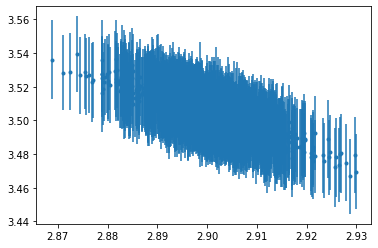

In [14]:
plt.errorbar(x_ex[:, 0], y_mean[:, 0], yerr=y_std[:, 0], fmt='.')

<ErrorbarContainer object of 3 artists>

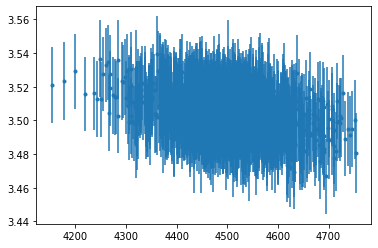

In [15]:
plt.errorbar(x_ex[:, 1], y_mean[:, 0], yerr=y_std[:, 0], fmt='.')

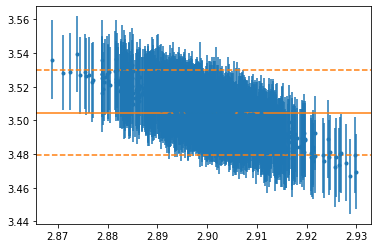

In [17]:
all_mean = y_ex[..., 0].ravel().mean()
all_std = y_ex[..., 0].ravel().std()
plt.errorbar(x_ex[:, 0] , y_ex.mean(axis=0)[:, 0], yerr=y_ex.std(axis=0)[:, 0], fmt='.')
plt.axhline(all_mean, color='C1')
plt.axhline(all_mean-all_std, color='C1', linestyle='--')
plt.axhline(all_mean+all_std, color='C1', linestyle='--')

In [19]:
import seaborn as sns

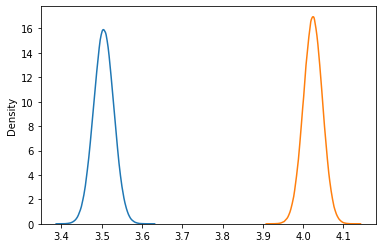

In [20]:
ax = plt.gca()
ax = sns.kdeplot(y_ex[..., 0].ravel(), ax=ax)
ax = sns.kdeplot(y_ex[..., 1].ravel(), ax=ax)

In [21]:
tau_he_mean = 10**all_mean
tau_he_std = all_std * np.log(10) * tau_he_mean

In [22]:
tau_he_mean

DeviceArray(3196.73303668, dtype=float64)

In [23]:
tau_he_std

DeviceArray(184.55710817, dtype=float64)

In [25]:
import numpyro.distributions as dist

In [29]:
log_err = numax_obs[1] / numax_obs[0] / np.log(10)

In [31]:
x = dist.Normal(loc=np.array([np.log10(numax_obs[0]), teff_obs[0]]), 
                scale=np.array([log_err, teff_obs[1]]))

In [34]:
prior.model = handlers.lift(prior.model, prior={'x', x})

In [58]:
x_test = np.ones((1, 2))
rng_key, new_key = random.split(rng_key)
ex_pred = prior.predict(new_key, x_test, kind='optimized', num_samples=1000)

In [59]:
y_ex = ex_pred['y']
y_mean = y_ex.mean(axis=0)
y_std = y_ex.std(axis=0)

In [60]:
y_mean.shape

(1, 2)

<ErrorbarContainer object of 3 artists>

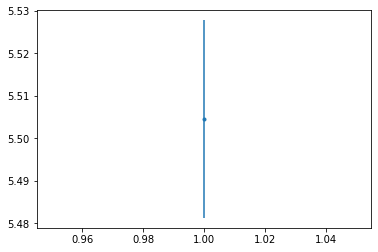

In [61]:
plt.errorbar(x_test[:, 0], y_mean[:, 0], yerr=y_std[:, 0], fmt='.')